# Setting up and Loading the PRISM Data

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import randint

# SciKit Learn Packages
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score

# Load the PRISM Dataframes

Files Downloaded from DepMap (https://depmap.org/portal/) on 06/26/2025

In [2]:
# PRISM Based Files (Compound Screening)
meta_data_file = pd.read_csv('Repurposing_Public_24Q2_Treatment_Meta_Data.csv')
prism_compound_file = pd.read_csv('Repurposing_Public_24Q2_Extended_Primary_Data_Matrix.csv')
compound_list_file = pd.read_csv('Repurposing_Public_24Q2_Extended_Primary_Compound_List.csv')

# Treatment Meta Data (NOT Important)

In [3]:
meta_data_file.head(5)

,profile_id,prism_replicate,perturbation_well,culture,perturbation_type,dose,broad_id,name,compound_plate,rep,screen
0,PREP049_PR500_120H_X1_P6:A02,PREP049_PR500_120H_X1_P6,A02,PR500A,trt_poscon,20.0,BRD-K88510285-001-37-6,Bortezomib,PREP049,X1,REP1M
1,PREP049_PR500_120H_X1_P6:A09,PREP049_PR500_120H_X1_P6,A09,PR500A,trt_poscon,20.0,BRD-K88510285-001-37-6,Bortezomib,PREP049,X1,REP1M
2,PREP049_PR500_120H_X1_P6:A10,PREP049_PR500_120H_X1_P6,A10,PR500A,trt_poscon,20.0,BRD-K88510285-001-37-6,Bortezomib,PREP049,X1,REP1M
3,PREP049_PR500_120H_X1_P6:A11,PREP049_PR500_120H_X1_P6,A11,PR500A,ctl_vehicle,2.5,DMSO,DMSO,PREP049,X1,REP1M
4,PREP049_PR500_120H_X1_P6:A18,PREP049_PR500_120H_X1_P6,A18,PR500A,NaN,NaN,NaN,NaN,PREP049,X1,REP1M


# Compound List File

In [4]:
compound_list_file.head(5)

,screen,dose,repurposing_target,MOA,IDs,Drug.Name,Synonyms
0,REP.300,2.5,NaN,NaN,BRD:BRD-K00104122-001-01-9,MRTX1133,MRTX1133
1,REP.300,2.5,NaN,NaN,BRD:BRD-K00104124-001-01-9,PEMIGATINIB,PEMIGATINIB
2,REP.300,2.5,NaN,NaN,BRD:BRD-K00085355-001-01-9,TELAVANCIN,TELAVANCIN
3,REP.300,2.5,NaN,NaN,BRD:BRD-K00075140-005-02-9,ECHOTHIOPHATE IODIDE,ECHOTHIOPHATE IODIDE
4,REP.300,2.5,NaN,NaN,BRD:BRD-K00080753-001-01-9,SPINOSAD,SPINOSAD


In [5]:
filt_compound_list = compound_list_file[['MOA', 'IDs', 'Drug.Name', 'Synonyms']]
print (filt_compound_list.shape)
print ("")
filt_compound_list.head(5)

(6790, 4)



,MOA,IDs,Drug.Name,Synonyms
0,NaN,BRD:BRD-K00104122-001-01-9,MRTX1133,MRTX1133
1,NaN,BRD:BRD-K00104124-001-01-9,PEMIGATINIB,PEMIGATINIB
2,NaN,BRD:BRD-K00085355-001-01-9,TELAVANCIN,TELAVANCIN
3,NaN,BRD:BRD-K00075140-005-02-9,ECHOTHIOPHATE IODIDE,ECHOTHIOPHATE IODIDE
4,NaN,BRD:BRD-K00080753-001-01-9,SPINOSAD,SPINOSAD


# Prism Compound File

In [6]:
prism_compound_file.head(5)

,Unnamed: 0,ACH-000001,ACH-000002,ACH-000004,ACH-000005,ACH-000006,ACH-000007,ACH-000008,ACH-000010,ACH-000011,...,ACH-002016,ACH-002022,ACH-002023,ACH-002025,ACH-002038,ACH-002039,ACH-002041,ACH-002042,ACH-002046,ACH-002048
0,BRD:BRD-A00047421-001-01-7,-1.207281,-4.231563,-3.860672,-2.271411,0.277833,-4.011285,-0.615105,-2.625300,-1.827661,...,-1.975287,-2.403487,-0.495741,-3.238121,1.223419,-2.314389,-2.805922,-2.332483,-3.441262,-1.254407
1,BRD:BRD-A00055058-001-01-0,0.515743,NaN,NaN,NaN,NaN,0.196878,0.347821,NaN,-0.001031,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BRD:BRD-A00077618-236-07-6,-0.015577,NaN,NaN,NaN,NaN,-0.095730,0.379480,NaN,0.145346,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BRD:BRD-A00092689-236-04-9,-0.395123,-0.538376,0.306971,0.035096,-0.124899,-0.861860,-0.137544,-0.206334,0.159798,...,-0.480284,0.156351,0.012775,0.304118,-0.397145,0.202935,-0.335913,-0.334916,-0.343913,0.154135
4,BRD:BRD-A00100033-001-08-9,-0.449332,NaN,NaN,NaN,NaN,0.257943,-0.596132,NaN,-0.499274,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Merge Dataframes

In [7]:
merged_dataframe = pd.merge(filt_compound_list, prism_compound_file, how='inner', left_on='IDs', 
                            right_on='Unnamed: 0')

merged_dataframe.to_csv("Drugs_Samples_Merged.csv")

In [8]:
merged_dataframe.head(5)

,MOA,IDs,Drug.Name,Synonyms,Unnamed: 0,ACH-000001,ACH-000002,ACH-000004,ACH-000005,ACH-000006,...,ACH-002016,ACH-002022,ACH-002023,ACH-002025,ACH-002038,ACH-002039,ACH-002041,ACH-002042,ACH-002046,ACH-002048
0,NaN,BRD:BRD-K00104122-001-01-9,MRTX1133,MRTX1133,BRD:BRD-K00104122-001-01-9,-0.302449,-0.141041,-0.245252,-0.799946,0.099662,...,0.272936,-1.047663,-0.082901,-0.647428,-0.880318,-0.582496,-0.005549,-0.993358,0.042941,0.861960
1,NaN,BRD:BRD-K00104124-001-01-9,PEMIGATINIB,PEMIGATINIB,BRD:BRD-K00104124-001-01-9,0.290421,-3.779251,-1.794686,-2.473698,-0.631550,...,-2.064927,-0.720002,-0.464946,-0.163037,0.206125,0.499020,-0.514484,-1.852438,-1.344820,-0.688940
2,NaN,BRD:BRD-K00085355-001-01-9,TELAVANCIN,TELAVANCIN,BRD:BRD-K00085355-001-01-9,0.613459,-0.084524,-0.277121,-0.580172,-0.129008,...,-0.322086,-0.313715,-0.576017,0.621876,0.068058,0.057111,-0.157856,0.604607,-0.653271,0.775926
3,NaN,BRD:BRD-K00075140-005-02-9,ECHOTHIOPHATE IODIDE,ECHOTHIOPHATE IODIDE,BRD:BRD-K00075140-005-02-9,-0.272153,-0.061195,0.115046,-0.027515,-0.482843,...,-0.248437,0.268635,0.932436,0.009118,-0.318758,-1.134722,-0.061786,-0.293730,0.184376,-0.186340
4,NaN,BRD:BRD-K00080753-001-01-9,SPINOSAD,SPINOSAD,BRD:BRD-K00080753-001-01-9,0.161045,-1.129581,-0.025217,-0.060901,-0.055692,...,0.600800,-0.127519,-0.042841,0.171812,0.168055,0.399179,0.048209,-0.249857,0.618223,0.591731


# Tally the Number of Columns for a Drug

In [9]:
# Identify the index of the first "ACH-" column
start_col = merged_dataframe.columns.get_loc("ACH-000001")

# Subset the dataframe to include only the ACH columns
ach_data = merged_dataframe.iloc[:, start_col:]

# Count the number of non-null (non-NaN) entries per row
entry_counts_per_row = ach_data.notna().sum(axis=1)

# Create a New Dataframe to Store the Counts
counting_dataframe = merged_dataframe[['MOA', 'IDs', 'Drug.Name', 'Synonyms']].copy()


# Add this count to the original dataframe
counting_dataframe["ACH_Entry_Count"] = entry_counts_per_row

counting_dataframe.to_csv("Counting_Samples-Dataframe.csv")


# See the Counting Table

In [10]:
# See The Table
counting_dataframe.head(5)

,MOA,IDs,Drug.Name,Synonyms,ACH_Entry_Count
0,NaN,BRD:BRD-K00104122-001-01-9,MRTX1133,MRTX1133,871
1,NaN,BRD:BRD-K00104124-001-01-9,PEMIGATINIB,PEMIGATINIB,871
2,NaN,BRD:BRD-K00085355-001-01-9,TELAVANCIN,TELAVANCIN,871
3,NaN,BRD:BRD-K00075140-005-02-9,ECHOTHIOPHATE IODIDE,ECHOTHIOPHATE IODIDE,871
4,NaN,BRD:BRD-K00080753-001-01-9,SPINOSAD,SPINOSAD,871


# See the Spread of the Data

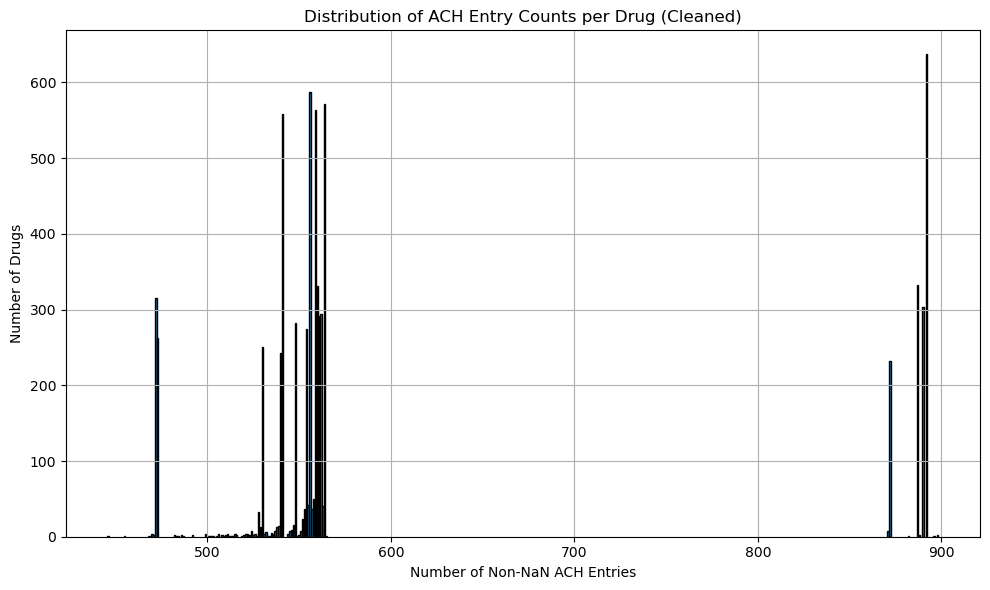

In [11]:
import matplotlib.pyplot as plt

# Value counts of unique ACH counts
value_counts = counting_dataframe["ACH_Entry_Count"].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index, value_counts.values, edgecolor='black')
plt.title("Distribution of ACH Entry Counts per Drug (Cleaned)")
plt.xlabel("Number of Non-NaN ACH Entries")
plt.ylabel("Number of Drugs")
plt.grid(True)
plt.tight_layout()
plt.show()

# Identify Potential Drugs of Interest

In [12]:
# Convert Drug Name to uppercase for consistent matching
counting_dataframe["Drug.Name_upper"] = counting_dataframe["Drug.Name"].fillna("").str.upper().str.strip()

# Define cancer-related keyword patterns (you can expand this list)
cancer_keywords = [
    "IB", "TINIB", "MAB", "CAR", "CETUX", "TRASTU", "LOX", "RAF", "PARP", "CDK", "BRAF"
]

# Filter for drugs with cancer-related names
cancer_related = counting_dataframe[counting_dataframe["Drug.Name_upper"].str.contains('|'.join(cancer_keywords))]

# Sort by highest ACH coverage
top_cancer_drugs = cancer_related.sort_values(by="ACH_Entry_Count", ascending=False).head(4)

# Combine both into one final dataframe
final_selection = pd.concat([top_cancer_drugs])

# Select only the columns of interest
final_selection = final_selection[["Drug.Name", "ACH_Entry_Count", "MOA", "Synonyms", "IDs"]]

# Display or export
print(final_selection)
# Optionally save
# final_selection.to_csv("Top_Cancer_Drugs_and_DMSO.csv", index=False)

        Drug.Name  ACH_Entry_Count  \
6518     IMATINIB              896   
5991   RIPRETINIB              892   
5730   LAZERTINIB              892   
5642  TRILACICLIB              892   

                                                    MOA     Synonyms  \
6518  BCR-ABL KINASE INHIBITOR, KIT INHIBITOR, PDGFR...     IMATINIB   
5991         RECEPTOR TYROSINE PROTEIN KINASE INHIBITOR   RIPRETINIB   
5730                          TYROSINE KINASE INHIBITOR   LAZERTINIB   
5642                                      CDK INHIBITOR  TRILACICLIB   

                             IDs  
6518  BRD:BRD-K92723993-001-17-4  
5991  BRD:BRD-K00005241-001-01-9  
5730  BRD:BRD-K00003501-001-01-9  
5642  BRD:BRD-K00003412-300-01-9  


# Lets Subset the Merged Dataframe for Drugs of Interest

In [13]:
# Step 1: Get list of BRD IDs for the drugs of interest
top_drug_ids = final_selection["IDs"].tolist()

# Step 2: Subset the merged PRISM dataframe to only those rows
subset_drug_matrix = merged_dataframe[merged_dataframe["IDs"].isin(top_drug_ids)]

# Step 3: Optional — verify shape and save
print(f"Subset shape: {subset_drug_matrix.shape}")
print(subset_drug_matrix[["Drug.Name", "IDs"]])

# Optional: save to file
subset_drug_matrix.to_csv("Subset_Top4_Cancer_Drugs.csv", index=False)

Subset shape: (4, 924)
        Drug.Name                         IDs
5642  TRILACICLIB  BRD:BRD-K00003412-300-01-9
5730   LAZERTINIB  BRD:BRD-K00003501-001-01-9
5991   RIPRETINIB  BRD:BRD-K00005241-001-01-9
6518     IMATINIB  BRD:BRD-K92723993-001-17-4


In [14]:
subset_drug_matrix.head(5)

,MOA,IDs,Drug.Name,Synonyms,Unnamed: 0,ACH-000001,ACH-000002,ACH-000004,ACH-000005,ACH-000006,...,ACH-002016,ACH-002022,ACH-002023,ACH-002025,ACH-002038,ACH-002039,ACH-002041,ACH-002042,ACH-002046,ACH-002048
5642,CDK INHIBITOR,BRD:BRD-K00003412-300-01-9,TRILACICLIB,TRILACICLIB,BRD:BRD-K00003412-300-01-9,0.811284,-2.034141,-1.353192,-1.249883,-0.316822,...,-1.113831,-1.001169,-1.183926,-0.348815,-1.923758,-1.756450,-1.082153,-1.213521,0.209534,-0.311847
5730,TYROSINE KINASE INHIBITOR,BRD:BRD-K00003501-001-01-9,LAZERTINIB,LAZERTINIB,BRD:BRD-K00003501-001-01-9,-0.859831,-0.849193,-0.241000,0.076372,1.739173,...,0.205132,0.021607,-1.307211,-1.739623,0.207574,0.357776,-0.290081,-0.246085,-0.165132,-0.659549
5991,RECEPTOR TYROSINE PROTEIN KINASE INHIBITOR,BRD:BRD-K00005241-001-01-9,RIPRETINIB,RIPRETINIB,BRD:BRD-K00005241-001-01-9,0.295176,-0.448103,0.082802,0.239000,0.378120,...,-0.615965,0.020557,-0.686733,0.006229,0.540466,-0.531357,-0.065697,-0.549431,-0.598007,-0.456611
6518,"BCR-ABL KINASE INHIBITOR, KIT INHIBITOR, PDGFR...",BRD:BRD-K92723993-001-17-4,IMATINIB,IMATINIB,BRD:BRD-K92723993-001-17-4,0.018308,0.062876,0.049729,-1.256785,-2.200762,...,-0.493104,-0.194088,-0.305644,0.431214,-0.015630,0.611415,0.432109,0.082649,-0.204807,-0.640925


In [15]:
# Step 1: Identify the start of the ACH columns
start_col = subset_drug_matrix.columns.get_loc("ACH-000001")

# Step 2: Extract drug name and ACH data
# Assuming you already subsetted to your 4 cancer drugs
ach_data = subset_drug_matrix.iloc[:, start_col:]
drug_names = subset_drug_matrix["Drug.Name"]

# Step 3: Set Drug Name as index and transpose
# This results in: rows = ACH cell lines, columns = drug names
transposed_df = ach_data.copy()
transposed_df.index = drug_names
transposed_df = transposed_df.T  # transpose

# Step 4: Optional cleanup
transposed_df.index.name = "ACH_ID"  # name the row index
transposed_df.columns.name = "Drug.Name"  # name the column header

# Preview
print(transposed_df.head())

Drug.Name   TRILACICLIB  LAZERTINIB  RIPRETINIB  IMATINIB
ACH_ID                                                   
ACH-000001     0.811284   -0.859831    0.295176  0.018308
ACH-000002    -2.034141   -0.849193   -0.448103  0.062876
ACH-000004    -1.353192   -0.241000    0.082802  0.049729
ACH-000005    -1.249883    0.076372    0.239000 -1.256785
ACH-000006    -0.316822    1.739173    0.378120 -2.200762


# Bring in More Meta Data

At this point--- we are missing something key--- we forgot to get the Meta data on the cell lines to know exactly what type of tumor types we are looking at

# Start Loading the DepMap Datasets Slowly
Some Files are Huge So Piece By Piece

In [16]:
# DepMap Related Files
cell_line_meta_data_file = pd.read_csv('Model.csv')

In [17]:
cell_line_meta_data_file.head(5)

,ModelID,PatientID,CellLineName,StrippedCellLineName,DepmapModelType,OncotreeLineage,OncotreePrimaryDisease,OncotreeSubtype,OncotreeCode,PatientSubtypeFeatures,...,EngineeredModelDetails,CulturedResistanceDrug,PublicComments,CCLEName,HCMIID,ModelAvailableInDbgap,ModelSubtypeFeatures,WTSIMasterCellID,SangerModelID,COSMICID
0,ACH-000001,PT-gj46wT,NIH:OVCAR-3,NIHOVCAR3,HGSOC,Ovary/Fallopian Tube,Ovarian Epithelial Tumor,High-Grade Serous Ovarian Cancer,HGSOC,NaN,...,NaN,NaN,NaN,NIHOVCAR3_OVARY,NaN,Available in SRA,NaN,2201.0,SIDM00105,905933.0
1,ACH-000002,PT-5qa3uk,HL-60,HL60,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"TP53(del), CDKN2A and NRAS mutations [PubMed=2...",...,NaN,NaN,NaN,HL60_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,55.0,SIDM00829,905938.0
2,ACH-000003,PT-puKIyc,CACO2,CACO2,COAD,Bowel,Colorectal Adenocarcinoma,Colon Adenocarcinoma,COAD,NaN,...,NaN,NaN,NaN,CACO2_LARGE_INTESTINE,NaN,Available in SRA,NaN,NaN,SIDM00891,NaN
3,ACH-000004,PT-q4K2cp,HEL,HEL,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,"JAK2 and TP53 mutations,",...,NaN,NaN,NaN,HEL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,783.0,SIDM00594,907053.0
4,ACH-000005,PT-q4K2cp,HEL 92.1.7,HEL9217,AML,Myeloid,Acute Myeloid Leukemia,Acute Myeloid Leukemia,AML,JAK2 and TP53 mutations,...,NaN,NaN,NaN,HEL9217_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NaN,Available in SRA,NaN,NaN,SIDM00593,NaN


In [18]:
# Define columns to keep
metadata_cols = [
    "ModelID",                  # ACH-XXXXX identifier
    "StrippedCellLineName",     # Clean version of cell line name
    "OncotreeLineage",          # Broad cancer lineage (e.g., Myeloid, Lung)
    "OncotreePrimaryDisease",   # Primary tumor type
    "OncotreeSubtype",          # Subtype (if available)
    "DepmapModelType",          # Disease code (e.g., AML, NSCLC)
    "Sex",
    "Age"
]

# Subset to relevant metadata
metadata_subset = cell_line_meta_data_file[metadata_cols]

# Preview
print(metadata_subset.head())

      ModelID StrippedCellLineName       OncotreeLineage  \
0  ACH-000001            NIHOVCAR3  Ovary/Fallopian Tube   
1  ACH-000002                 HL60               Myeloid   
2  ACH-000003                CACO2                 Bowel   
3  ACH-000004                  HEL               Myeloid   
4  ACH-000005              HEL9217               Myeloid   

      OncotreePrimaryDisease                   OncotreeSubtype  \
0   Ovarian Epithelial Tumor  High-Grade Serous Ovarian Cancer   
1     Acute Myeloid Leukemia            Acute Myeloid Leukemia   
2  Colorectal Adenocarcinoma              Colon Adenocarcinoma   
3     Acute Myeloid Leukemia            Acute Myeloid Leukemia   
4     Acute Myeloid Leukemia            Acute Myeloid Leukemia   

  DepmapModelType     Sex   Age  
0           HGSOC  Female  60.0  
1             AML  Female  36.0  
2            COAD    Male  72.0  
3             AML    Male  30.0  
4             AML    Male  30.0  


# Now Lets Merge the Two Tables

In [19]:
# Step 1: Merge the metadata with the transposed drug matrix
# Reset index so ACH_ID is a column
transposed_df_reset = transposed_df.reset_index()

# Merge on ACH_ID == ModelID from metadata
merged_with_meta = pd.merge(
    transposed_df_reset,
    metadata_subset,
    left_on="ACH_ID",
    right_on="ModelID",
    how="inner"  # keep only ACH_IDs that were in the transposed matrix
)

# Step 2: Replace ACH_ID with StrippedCellLineName
# Set index to StrippedCellLineName
merged_with_meta = merged_with_meta.set_index("StrippedCellLineName")

# Optional: drop redundant columns
merged_with_meta = merged_with_meta.drop(columns=["ACH_ID", "ModelID"])

# Step 3: Preview
print(merged_with_meta.head())

# Optional: Save the merged matrix
# merged_with_meta.to_csv("Merged_Transposed_DrugMatrix_With_Metadata.csv")

                      TRILACICLIB  LAZERTINIB  RIPRETINIB  IMATINIB  \
StrippedCellLineName                                                  
NIHOVCAR3                0.811284   -0.859831    0.295176  0.018308   
HL60                    -2.034141   -0.849193   -0.448103  0.062876   
HEL                     -1.353192   -0.241000    0.082802  0.049729   
HEL9217                 -1.249883    0.076372    0.239000 -1.256785   
MONOMAC6                -0.316822    1.739173    0.378120 -2.200762   

                           OncotreeLineage    OncotreePrimaryDisease  \
StrippedCellLineName                                                   
NIHOVCAR3             Ovary/Fallopian Tube  Ovarian Epithelial Tumor   
HL60                               Myeloid    Acute Myeloid Leukemia   
HEL                                Myeloid    Acute Myeloid Leukemia   
HEL9217                            Myeloid    Acute Myeloid Leukemia   
MONOMAC6                           Myeloid    Acute Myeloid Leukemia  

# Re-Order the Table

In [20]:
# Step 1: Reset index and merge metadata again (if needed)
transposed_df_reset = transposed_df.reset_index()
merged = pd.merge(
    transposed_df_reset,
    metadata_subset,
    left_on="ACH_ID",
    right_on="ModelID",
    how="inner"
)

# Step 2: Reorder columns — metadata first, drugs second
# Extract metadata and drug columns
meta_cols = [
    "StrippedCellLineName", "OncotreeLineage", "OncotreePrimaryDisease",
    "OncotreeSubtype", "DepmapModelType", "Sex", "Age"
]
drug_cols = [col for col in transposed_df.columns]  # drug names from transposed_df

# Reorder columns
ordered_df = merged[meta_cols + drug_cols]

# Step 3: Set stripped name as index
ordered_df = ordered_df.set_index("StrippedCellLineName")

# Preview
print(ordered_df.head(5))

# Optional: Save
ordered_df.to_csv("Metadata_First_DrugData_After.csv")

                           OncotreeLineage    OncotreePrimaryDisease  \
StrippedCellLineName                                                   
NIHOVCAR3             Ovary/Fallopian Tube  Ovarian Epithelial Tumor   
HL60                               Myeloid    Acute Myeloid Leukemia   
HEL                                Myeloid    Acute Myeloid Leukemia   
HEL9217                            Myeloid    Acute Myeloid Leukemia   
MONOMAC6                           Myeloid    Acute Myeloid Leukemia   

                                           OncotreeSubtype DepmapModelType  \
StrippedCellLineName                                                         
NIHOVCAR3                 High-Grade Serous Ovarian Cancer           HGSOC   
HL60                                Acute Myeloid Leukemia             AML   
HEL                                 Acute Myeloid Leukemia             AML   
HEL9217                             Acute Myeloid Leukemia             AML   
MONOMAC6              Acute

# Get the Counts Per Lineage

In [21]:
# Count how many cell lines per OncotreeLineage
lineage_counts = ordered_df["OncotreeLineage"].value_counts().reset_index()
lineage_counts.columns = ["OncotreeLineage", "CellLine_Count"]

# Sort (optional)
lineage_counts = lineage_counts.sort_values(by="CellLine_Count", ascending=False)

# Display
print(lineage_counts)

# Optional: Save to CSV
# lineage_counts.to_csv("CellLine_Counts_By_Lineage.csv", index=False)

              OncotreeLineage  CellLine_Count
0                        Lung             123
1                    Lymphoid              82
2                   CNS/Brain              64
3           Esophagus/Stomach              58
4                        Skin              53
5        Ovary/Fallopian Tube              47
6                       Bowel              45
7                    Pancreas              44
8               Head and Neck              43
9                      Uterus              34
10              Biliary Tract              33
11                     Breast              33
12                    Myeloid              33
14                Soft Tissue              32
13                       Bone              32
15                     Kidney              30
16      Bladder/Urinary Tract              30
17                      Liver              22
18  Peripheral Nervous System              17
19                    Thyroid              13
20                     Cervix     

# Decision Points and Discussion Where are Things Going?

Part 1: Best for Heatmap Visualization
✅ Goals:

    Visually compare cell lines (rows) by drug response (columns)

    Group rows by lineage or tumor subtype

    Avoid clutter (too many low-sample lineages)

📌 Ideal Criteria:

    ≥ 8–10 cell lines per lineage for recognizable blocks

    Lineages with diverse drug responses (not all resistant/sensitive)

    Optionally grouped by OncotreePrimaryDisease or Subtype for nuance

🤖 Part 2: Best for Machine Learning
✅ Goals:

    Predict drug response (e.g., sensitive/resistant or continuous AUC)

    Use features like gene expression or CRISPR dependency

    Ensure balanced sample counts across classes or lineages

📌 Ideal Criteria:

    Binary classification: ≥ 20–30 samples minimum

    Multiclass (e.g., by lineage or disease): aim for ≥ 50–100 total samples

    Prefer lineages with:

        Diverse expression

        Strong pharmacologic signal (not all flat)

# Examine the Histogram Spread of Lineages

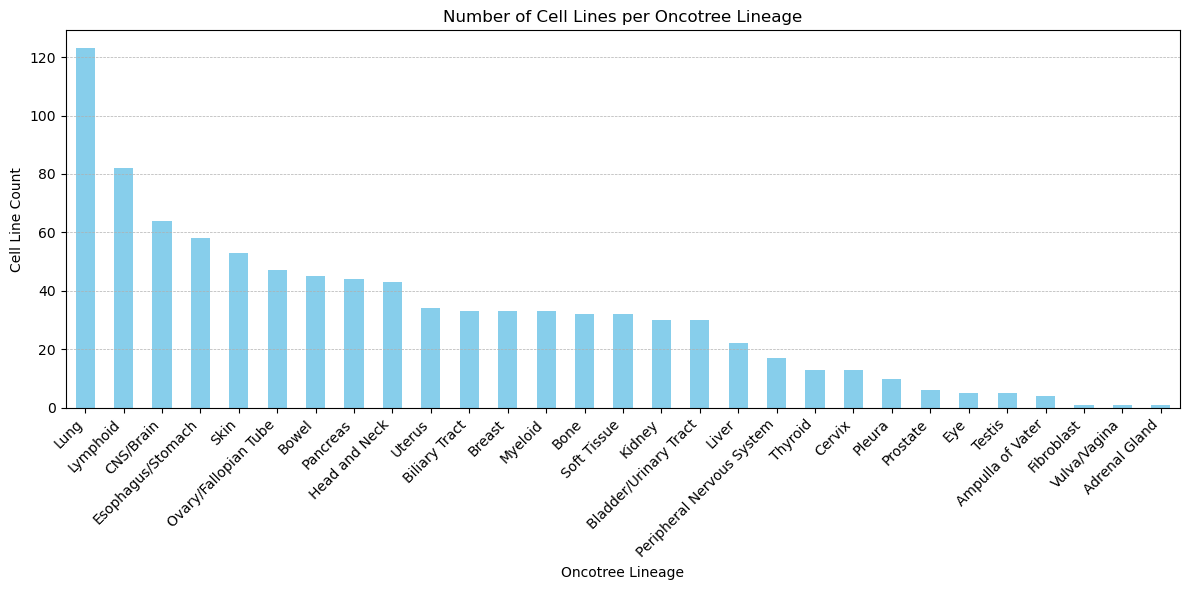

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged metadata and drug response data
merged_df = pd.read_csv("Metadata_First_DrugData_After.csv")

# Count occurrences of each lineage
lineage_counts = merged_df["OncotreeLineage"].value_counts()

# Plot the bar chart
plt.figure(figsize=(12, 6))
lineage_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Cell Lines per Oncotree Lineage")
plt.xlabel("Oncotree Lineage")
plt.ylabel("Cell Line Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Grouped Heatmap By Lineage First

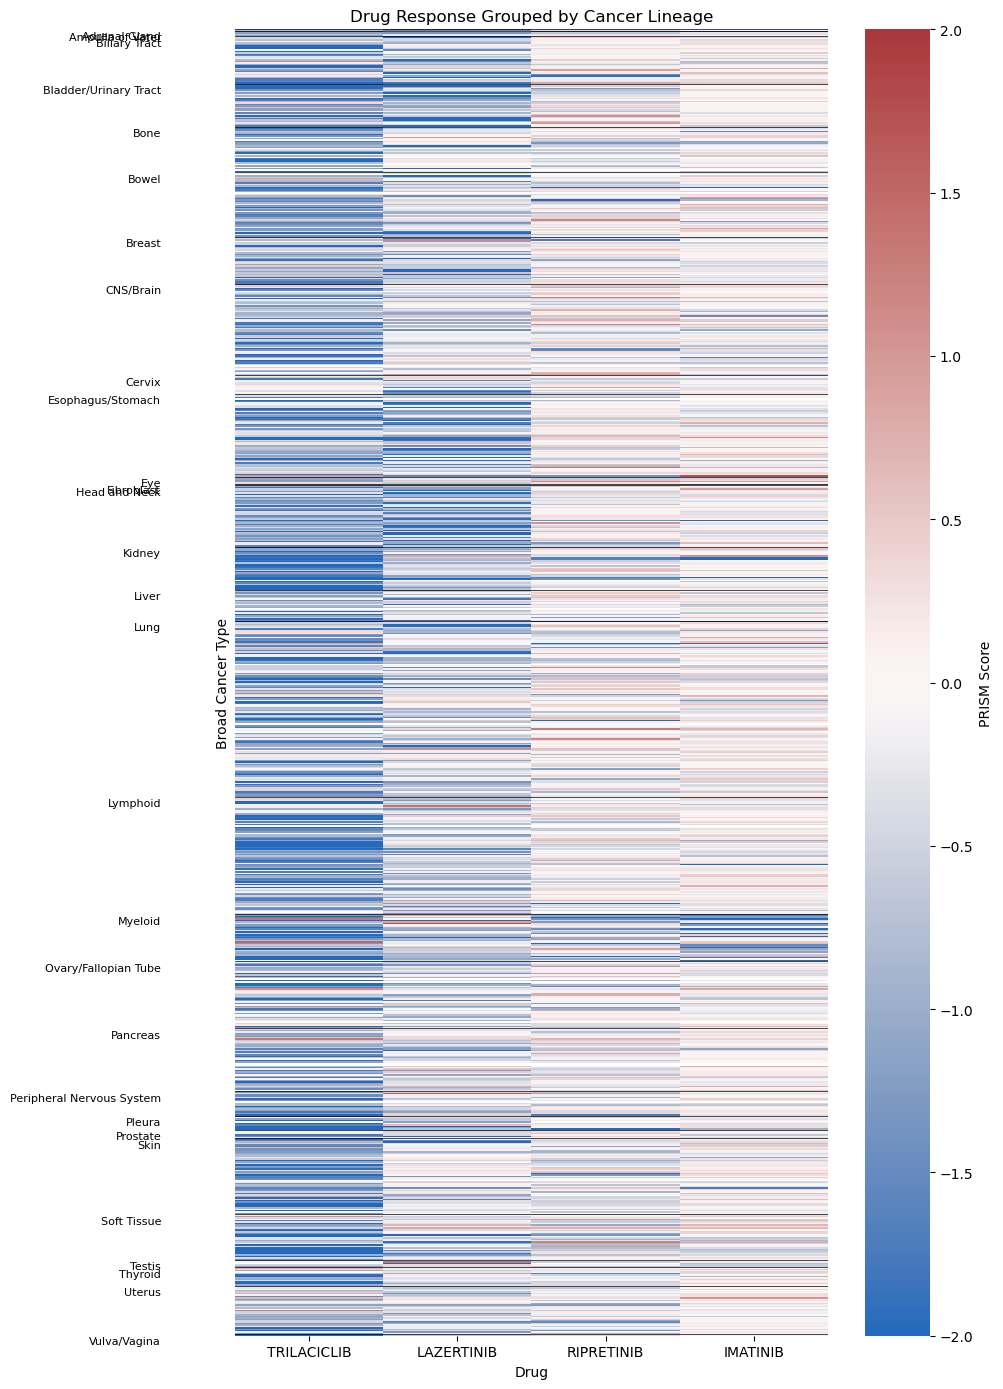

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as patches

# Load merged metadata + drug response matrix
df = pd.read_csv("Metadata_First_DrugData_After.csv")

# Sort by OncotreeLineage (broad cancer type)
df_sorted = df.sort_values(by="OncotreeLineage")

# Pull out lineage and drug response values
lineages = df_sorted["OncotreeLineage"].values
drug_data = df_sorted[["TRILACICLIB", "LAZERTINIB", "RIPRETINIB", "IMATINIB"]]

# Set up plot
plt.figure(figsize=(10, 14))

# Draw heatmap
ax = sns.heatmap(
    drug_data,
    cmap="vlag",
    vmin=-2, vmax=2,
    xticklabels=True,
    yticklabels=False,  # We'll add lineage group labels separately
    cbar_kws={"label": "PRISM Score"}
)

# Add horizontal line between lineage groups
last_lineage = None
for i, lineage in enumerate(lineages):
    if lineage != last_lineage:
        ax.axhline(i, color='black', linewidth=0.5)
        ax.text(-0.5, i + 1, lineage, fontsize=8, va='top', ha='right', rotation=0)
        last_lineage = lineage

# Titles and labels
plt.title("Drug Response Grouped by Cancer Lineage")
plt.xlabel("Drug")
plt.ylabel("Broad Cancer Type")

plt.tight_layout()

plt.savefig("lineage_grouped_drug_response_heatmap.png", dpi=300)

plt.show()

# Draw Squares Around the Boxes of Interest

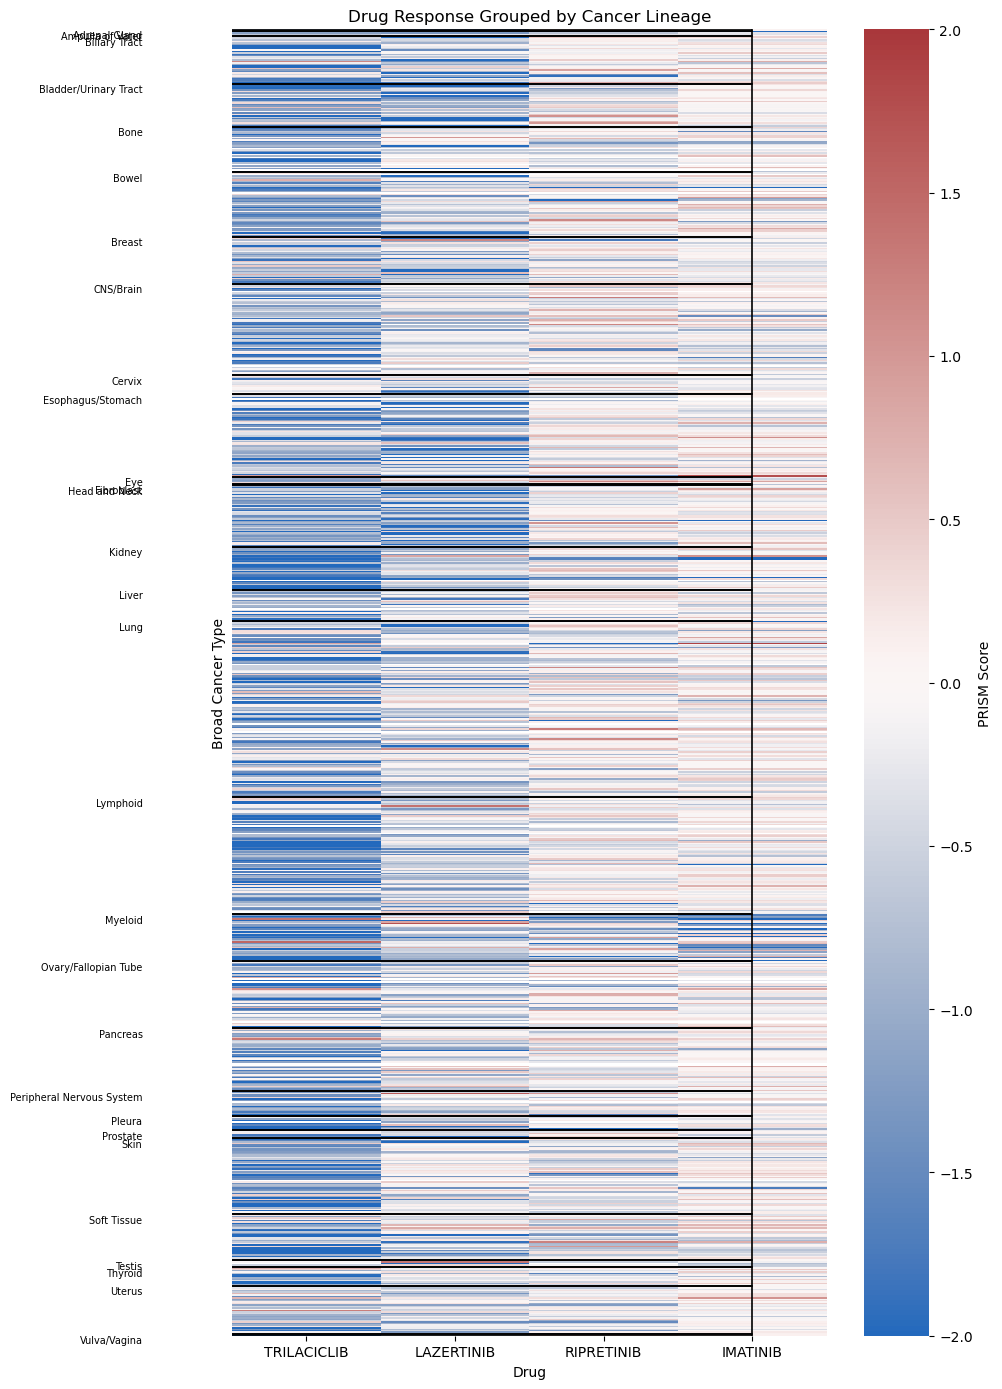

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.patches as patches

# Load merged metadata + drug response matrix
df = pd.read_csv("Metadata_First_DrugData_After.csv")

# Sort by OncotreeLineage (broad cancer type)
df_sorted = df.sort_values(by="OncotreeLineage").reset_index(drop=True)

# Pull out lineage and drug response values
lineages = df_sorted["OncotreeLineage"].values
drug_data = df_sorted[["TRILACICLIB", "LAZERTINIB", "RIPRETINIB", "IMATINIB"]]

# Set up plot
plt.figure(figsize=(10, 14))
ax = sns.heatmap(
    drug_data,
    cmap="vlag",
    vmin=-2, vmax=2,
    xticklabels=True,
    yticklabels=False,
    cbar_kws={"label": "PRISM Score"}
)

# Draw rectangles around each lineage block
last_lineage = None
start_idx = 0

for i, lineage in enumerate(lineages):
    if lineage != last_lineage:
        if last_lineage is not None:
            # Draw rectangle from start_idx to i
            height = i - start_idx
            rect = patches.Rectangle(
                (-0.5, start_idx),        # (x, y)
                len(drug_data.columns),   # width
                height,                   # height
                linewidth=1.2,
                edgecolor='black',
                facecolor='none'
            )
            ax.add_patch(rect)
        # Add label
        ax.text(-0.6, start_idx + 0.5, last_lineage, fontsize=7, va='top', ha='right', rotation=0)
        start_idx = i
        last_lineage = lineage

# Final rectangle and label for last group
height = len(lineages) - start_idx
rect = patches.Rectangle(
    (-0.5, start_idx),
    len(drug_data.columns),
    height,
    linewidth=1.2,
    edgecolor='black',
    facecolor='none'
)
ax.add_patch(rect)
ax.text(-0.6, start_idx + 0.5, last_lineage, fontsize=7, va='top', ha='right', rotation=0)

# Titles and labels
plt.title("Drug Response Grouped by Cancer Lineage")
plt.xlabel("Drug")
plt.ylabel("Broad Cancer Type")
plt.tight_layout()

# Save high-res image
plt.savefig("lineage_grouped_drug_response_heatmap_boxed.png", dpi=300)

plt.show()

# Conclusion of Results

Clinical Context and Machine Learning Feasibility of Selected Drugs

A literature review and clinical update on the selected compounds reveals important distinctions in translational potential:

    Trilaciclib: Although it shows broad cytotoxicity in PRISM data (with many cell lines scoring < -1), this is likely reflective of non-specific toxicity. Clinical trials have demonstrated limited efficacy as a direct anti-cancer agent, and it is now primarily used as a supportive care drug to protect bone marrow during chemotherapy—not to target tumors directly. Therefore, Trilaciclib is unsuitable for machine learning, as the signal represents general toxicity rather than cancer-selective response.

    Lazertinib: This compound demonstrates a more promising profile. In PRISM data, it exhibits a clear split between responders and non-responders, which is ideal for binary classification models. Clinically, Lazertinib is an approved third-generation EGFR tyrosine kinase inhibitor used to treat non-small cell lung cancer (NSCLC) with EGFR mutations. It is already in clinical use with established efficacy, making it a strong candidate for further biomarker discovery and ML modeling.

    Ripretinib: A broad-spectrum KIT and PDGFRα inhibitor, Ripretinib is FDA-approved for advanced gastrointestinal stromal tumors (GIST). Its PRISM profile shows more targeted efficacy, with sensitivity limited to certain cell lines—potentially useful for ML classification if bins are carefully defined based on lineage or mutational context.

    Imatinib: A classic BCR-ABL inhibitor with additional activity against KIT and PDGFR, Imatinib is widely used in chronic myeloid leukemia (CML) and GIST. The PRISM data shows selective responses consistent with its known indications. Like Ripretinib, Imatinib may be viable for ML, particularly when stratified by cancer type or mutational driver.

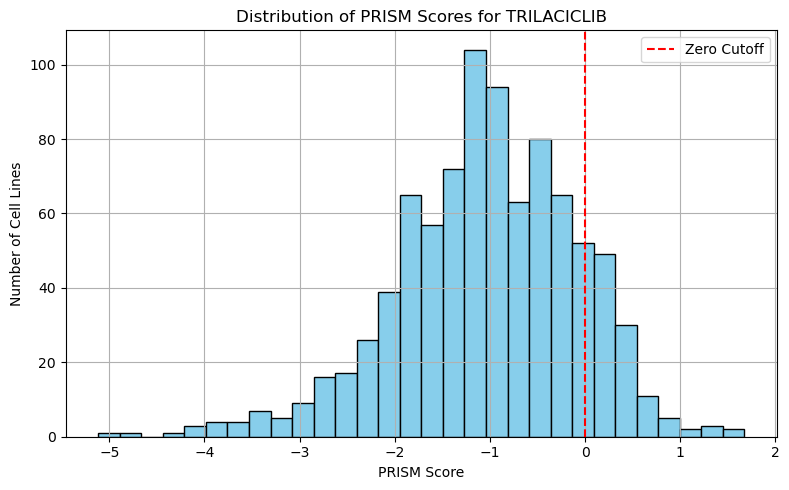

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Metadata_First_DrugData_After.csv")

# Select the drug you're interested in
# Change the drug_name to "LAZERTINIB", "TRILACICLIB", "RIPRETINIB", "IMATINIB"
drug_name = "TRILACICLIB"

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df[drug_name].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of PRISM Scores for {drug_name}")
plt.xlabel("PRISM Score")
plt.ylabel("Number of Cell Lines")
plt.axvline(0, color='red', linestyle='--', label='Zero Cutoff')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"Histogram_{drug_name}.png", dpi=300)
plt.show()

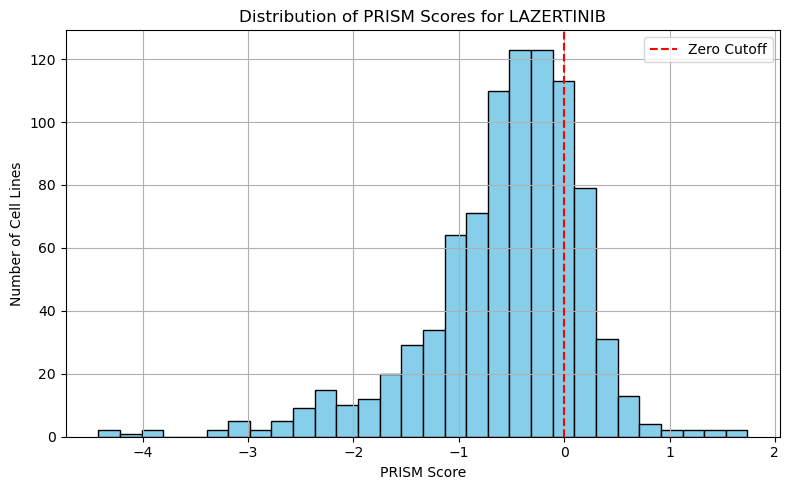

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Metadata_First_DrugData_After.csv")

# Select the drug you're interested in
# Change the drug_name to "LAZERTINIB", "TRILACICLIB", "RIPRETINIB", "IMATINIB"
drug_name = "LAZERTINIB"

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df[drug_name].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of PRISM Scores for {drug_name}")
plt.xlabel("PRISM Score")
plt.ylabel("Number of Cell Lines")
plt.axvline(0, color='red', linestyle='--', label='Zero Cutoff')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"Histogram_{drug_name}.png", dpi=300)
plt.show()

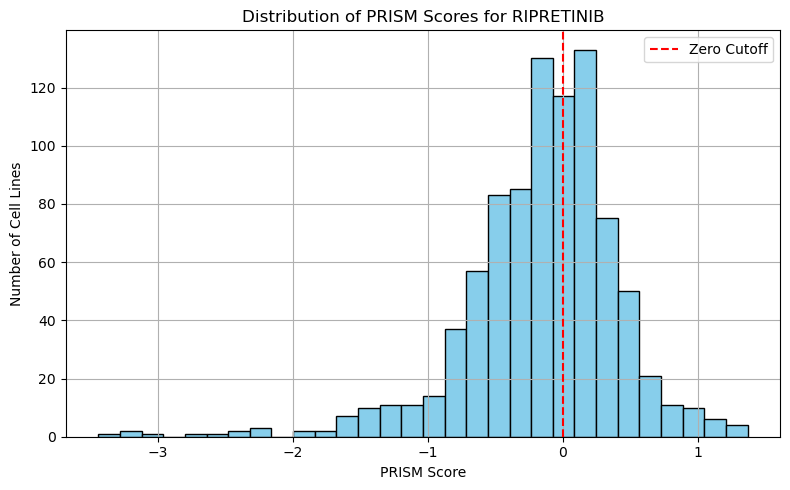

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Metadata_First_DrugData_After.csv")

# Select the drug you're interested in
# Change the drug_name to "LAZERTINIB", "TRILACICLIB", "RIPRETINIB", "IMATINIB"
drug_name = "RIPRETINIB"

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df[drug_name].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of PRISM Scores for {drug_name}")
plt.xlabel("PRISM Score")
plt.ylabel("Number of Cell Lines")
plt.axvline(0, color='red', linestyle='--', label='Zero Cutoff')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"Histogram_{drug_name}.png", dpi=300)
plt.show()

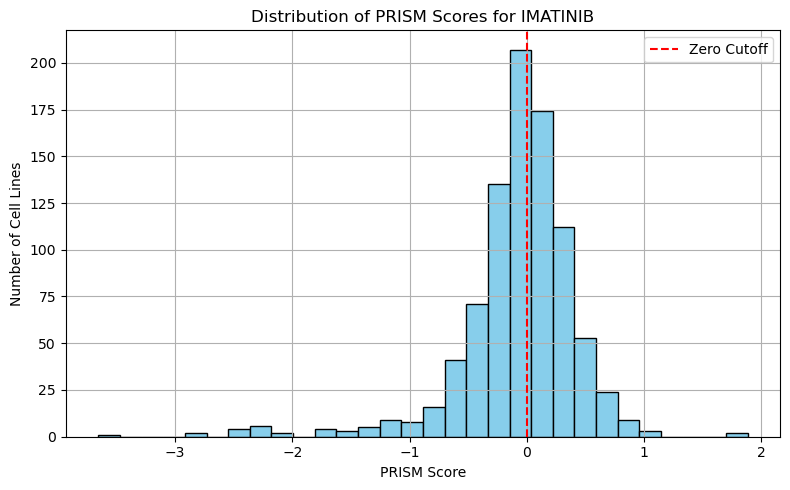

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("Metadata_First_DrugData_After.csv")

# Select the drug you're interested in
# Change the drug_name to "LAZERTINIB", "TRILACICLIB", "RIPRETINIB", "IMATINIB"
drug_name = "IMATINIB"

# Plot histogram
plt.figure(figsize=(8, 5))
plt.hist(df[drug_name].dropna(), bins=30, edgecolor='black', color='skyblue')
plt.title(f"Distribution of PRISM Scores for {drug_name}")
plt.xlabel("PRISM Score")
plt.ylabel("Number of Cell Lines")
plt.axvline(0, color='red', linestyle='--', label='Zero Cutoff')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig(f"Histogram_{drug_name}.png", dpi=300)
plt.show()

— Lazertinib has the cleanest, most ML-friendly distribution:

    It shows a bimodal-ish or wide spread response profile, indicating both responders (low PRISM scores, left) and non-responders (high scores, right).

    You can bin ~400–500 samples reasonably across a threshold (e.g. PRISM < -0.75 for sensitive and > -0.25 or > 0 for resistant).

    Ripretinib and Imatinib cluster tightly and may be hard to bin cleanly without getting severe class imbalance or poor signal.

    Trilaciclib is broadly toxic across most cell lines — making it hard to distinguish mechanistic selectivity vs. general cytotoxicity.

So for machine learning:

    Lazertinib = ✅ Strong candidate

    Ripretinib/Imatinib = ⚠️ Possible but noisy

    Trilaciclib = ❌ Likely not usable (acts as a cytotoxin rather than selective agent)

# DepMap Data files

 Note on Large File Usage

To conserve memory and optimize performance, the following large datasets (each ~0.5 GB) will only be loaded when needed:

    CRISPRGeneEffect.csv

    OmicsExpressionProteinCodingGenesTPMLogp1BatchCorrected.csv
    
    (Downloaded from the DepMap Portal on June 26, 2025)


# Realized a Mistake--- We Removed the ACH ID from the Drug Data File---- Facepalm--- Need to Put Back

In [29]:
import pandas as pd

# Step 1: Load both datasets, treating blank/whitespace/etc as NaN
df_drugs = pd.read_csv("Metadata_First_DrugData_After.csv", na_values=["", " ", "\t", "\u00A0", "NA", "null"])
df_model = pd.read_csv("Model.csv", na_values=["", " ", "\t", "\u00A0", "NA", "null"])

# Step 2: Force LAZERTINIB column to numeric — invalid or blank values become NaN
if "LAZERTINIB" in df_drugs.columns:
    df_drugs["LAZERTINIB"] = pd.to_numeric(df_drugs["LAZERTINIB"], errors="coerce")

# Step 3: Merge on stripped cell line name
merged_df = df_drugs.merge(
    df_model[["StrippedCellLineName", "ModelID"]],
    on="StrippedCellLineName",
    how="inner"
)

# Step 4: Drop irrelevant drug columns
columns_to_keep = [col for col in merged_df.columns if col not in ["TRILACICLIB", "RIPRETINIB", "IMATINIB"]]
df_filtered = merged_df[columns_to_keep]

# Step 5: Move LAZERTINIB to the end
cols = [col for col in df_filtered.columns if col != "LAZERTINIB"] + ["LAZERTINIB"]
df_final = df_filtered[cols]

# Step 6: Drop LAZERTINIB-related columns if all values are missing
cols_to_drop = [col for col in df_final.columns if "LAZERTINIB" in col and df_final[col].isna().all()]
df_final = df_final.drop(columns=cols_to_drop)

# Step 7: Save cleaned file
df_final.to_csv("Lazertinib_With_ACH.csv", index=False)
print("✅ Cleaned dataset saved to Lazertinib_With_ACH.csv")

# Optional: check if any LAZERTINIB values are still missing
if "LAZERTINIB" in df_final.columns:
    missing_count = df_final["LAZERTINIB"].isna().sum()
    print(f"ℹ️ Missing LAZERTINIB entries: {missing_count}")

    
df_final = df_final.dropna(subset=["LAZERTINIB"])
df_final.to_csv("Lazertinib_With_ACH_NoMissing.csv", index=False)
print("✅ Saved version with missing LAZERTINIB rows removed.")



✅ Cleaned dataset saved to Lazertinib_With_ACH.csv
ℹ️ Missing LAZERTINIB entries: 27
✅ Saved version with missing LAZERTINIB rows removed.


# See what the Initial CRISPR Gene Effect File Looks Like

In [30]:
# Load CRISPR data
crispr_dataframe = pd.read_csv('CRISPRGeneEffect.csv')
print(crispr_dataframe.head(5))

   Unnamed: 0  A1BG (1)  A1CF (29974)   A2M (2)  A2ML1 (144568)  \
0  ACH-000001 -0.121964      0.042647  0.026102       -0.147614   
1  ACH-000004 -0.016484     -0.088500 -0.088198       -0.041225   
2  ACH-000005 -0.184847      0.003300  0.160881        0.086224   
3  ACH-000007 -0.071921     -0.113717  0.082872        0.099633   
4  ACH-000009 -0.019163     -0.134669  0.060323        0.076647   

   A3GALT2 (127550)  A4GALT (53947)  A4GNT (51146)  AAAS (8086)  AACS (65985)  \
0         -0.020425        0.184014      -0.076020    -0.097068      0.182759   
1         -0.028074       -0.157206       0.280101    -0.106904      0.178125   
2         -0.149315       -0.253837       0.167011    -0.101209     -0.129827   
3         -0.008378       -0.022310       0.014416    -0.184977     -0.173739   
4          0.078922       -0.100243       0.047559    -0.136988      0.037759   

   ...  ZWILCH (55055)  ZWINT (11130)  ZXDA (7789)  ZXDB (158586)  \
0  ...       -0.120536       0.107286    

# Need to Examine the Gene Effect Variance in the File

In [31]:
import pandas as pd

print ("Starting to Run")

# Load CRISPR data
crispr_dataframe = pd.read_csv('CRISPRGeneEffect.csv')

# Drop non-numeric columns (like ACH_ID)
crispr_numeric = crispr_dataframe.select_dtypes(include='number')

# Calculate variance
variance_results = crispr_numeric.var()  # Now no warning

# Save to CSV
variance_results.to_csv("CRISPR_Gene_Effect_Variance.csv")
print ("Done Running")

Starting to Run
Done Running


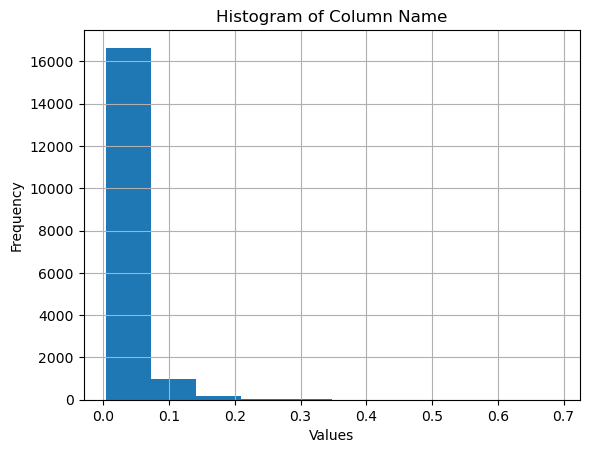

In [32]:
# Read the CSV file into a DataFrame
variance_df = pd.read_csv('CRISPR_Gene_Effect_Variance.csv')

# Plot a histogram of a single column in the DataFrame
variance_df.hist(column='0')

# Set the title and axis labels
plt.title('Histogram of Column Name')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

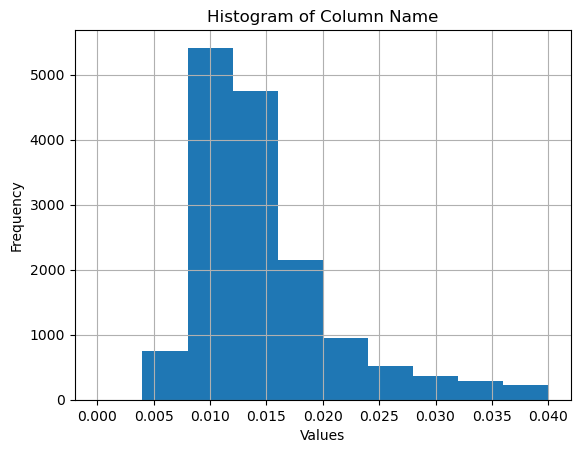

In [33]:
# Read the CSV file into a DataFrame
variance_df = pd.read_csv('CRISPR_Gene_Effect_Variance.csv')

# Plot a histogram of a single column in the DataFrame
variance_df.hist(column='0', range=[0, 0.04])

# Set the title and axis labels
plt.title('Histogram of Column Name')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

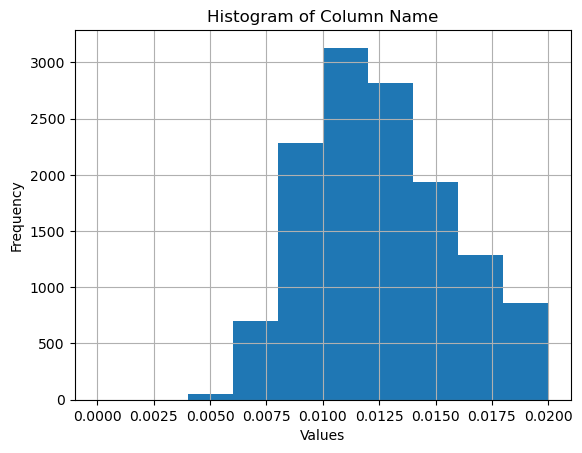

In [34]:
# Read the CSV file into a DataFrame
variance_df = pd.read_csv('CRISPR_Gene_Effect_Variance.csv')

# Plot a histogram of a single column in the DataFrame
variance_df.hist(column='0', range=[0, 0.02])

# Set the title and axis labels
plt.title('Histogram of Column Name')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Display the histogram
plt.show()

To reduce noise and dimensionality, we filtered genes with variance < 0.02. This cutoff was chosen after visualizing the distribution — a large pile-up of low-variance genes between 0.005–0.015 indicated minimal differentiation across samples, which could handicap model performance. By cutting at 0.02, we retained only those features with meaningful variation

✅ 0.02 Threshold = Goldilocks Zone

    🟠 Too low (e.g., 0.005): keeps noise
    🔴 Too high (e.g., 0.05): cuts signal
    ✅ Just right (0.02): balances dimensionality and information

# Find ALL Genes With Low Variance <0.02

In [35]:
import pandas as pd

print ("Starting to Run")

# Load the CRISPR data
crispr_dataframe = pd.read_csv('CRISPRGeneEffect.csv')

# Drop non-numeric columns (e.g., ACH_ID if present)
crispr_numeric = crispr_dataframe.select_dtypes(include='number')

# Calculate variance for each gene
variance_results = crispr_numeric.var()

# Identify low-variance genes
low_variance_genes = variance_results[variance_results < 0.02].index.tolist()

# Print summary
print(f"Total Genes Initially: {len(variance_results)}")
print(f"Total Genes with Low Variance (<0.02): {len(low_variance_genes)}")

# Save list of low-variance gene names to CSV (no header, one column)
pd.Series(low_variance_genes).to_csv("Low_Variance_Genes.csv", index=False, header=False)

Starting to Run
Total Genes Initially: 17916
Total Genes with Low Variance (<0.02): 13073


# Filter the Low Variance Genes for New CRISPR File

In [36]:
import pandas as pd

print ("Starting to Run")
# Load full CRISPR gene effect data
crispr_df = pd.read_csv('CRISPRGeneEffect.csv')
print("Original DataFrame Shape:", crispr_df.shape)

# Load list of low-variance genes (column names to drop)
columns_to_remove = pd.read_csv("Low_Variance_Genes.csv", header=None)[0].tolist()

# Drop low-variance columns (genes)
filtered_crispr_df = crispr_df.drop(columns=columns_to_remove, axis=1)
print("Filtered DataFrame Shape:", filtered_crispr_df.shape)

# Save filtered version for later use (e.g., before merging with drug data)
filtered_crispr_df.to_csv("CRISPRGeneEffect_Filtered.csv", index=False)
print ("Done Running")

Starting to Run
Original DataFrame Shape: (1178, 17917)
Filtered DataFrame Shape: (1178, 4844)
Done Running


In [37]:
# See What the new Dataframe Looks Like (QC Step)
print(filtered_crispr_df.head(5))

   Unnamed: 0  AAAS (8086)  AAMP (14)  AARS1 (16)  AARS2 (57505)  \
0  ACH-000001    -0.097068  -1.055267   -2.708780      -0.833467   
1  ACH-000004    -0.106904  -1.175150   -1.858867      -0.385564   
2  ACH-000005    -0.101209  -1.223433   -2.269649      -0.182065   
3  ACH-000007    -0.184977  -1.469741   -2.273808      -0.487151   
4  ACH-000009    -0.136988  -1.375361   -1.983409      -0.328644   

   AASDHPPT (60496)  AATF (26574)  ABCB10 (23456)  ABCB7 (22)  ABCD1 (215)  \
0         -0.408210     -0.387004        0.002005   -0.595197    -0.281760   
1         -0.428503     -0.665771        0.148739   -1.147966    -0.340706   
2         -0.210123     -0.777176        0.325012   -0.959633    -0.106974   
3         -0.600583     -0.869985        0.186552   -1.148365    -0.156586   
4         -0.271590     -0.475127       -0.113030   -1.797468    -0.203249   

   ...  ZRANB1 (54764)  ZRANB2 (9406)  ZRSR2 (8233)  ZSCAN5B (342933)  \
0  ...       -0.137164      -0.270303     -1.3059

# Merge the Dataframes for Machine Learning

In [38]:
print ("Starting to Run")

# Load CRISPR data and name the first column as 'ACH_ID'
crispr_df = pd.read_csv("CRISPRGeneEffect_Filtered.csv", index_col=0)
crispr_df.index.name = "ACH_ID"
crispr_df.reset_index(inplace=True)  # Move ACH_ID to a column for merging

# Load Lazertinib data
lazertinib_df = pd.read_csv("Lazertinib_With_ACH_NoMissing.csv")

# Merge using ACH_ID from CRISPR and ModelID from Lazertinib
merged_crispr_df = pd.merge(
    lazertinib_df[["ModelID", "LAZERTINIB"]],
    crispr_df,
    left_on="ModelID",
    right_on="ACH_ID",
    how="inner"
)

# Drop redundant ModelID column
merged_crispr_df.drop(columns=["ModelID"], inplace=True)

# Optional: Reorder columns if needed
columns_order = ["ACH_ID","LAZERTINIB"] + [col for col in merged_crispr_df.columns if col not in ["LAZERTINIB", "ModelID", "ACH_ID"]]
merged_crispr_df = merged_crispr_df[columns_order]

# Save to file
merged_crispr_df.to_csv("CRISPR_Lazertinib_Merged.csv", index=False)
print(merged_crispr_df.head(5))

Starting to Run
       ACH_ID  LAZERTINIB  AAAS (8086)  AAMP (14)  AARS1 (16)  AARS2 (57505)  \
0  ACH-000001   -0.859831    -0.097068  -1.055267   -2.708780      -0.833467   
1  ACH-000004   -0.241000    -0.106904  -1.175150   -1.858867      -0.385564   
2  ACH-000005    0.076372    -0.101209  -1.223433   -2.269649      -0.182065   
3  ACH-000007   -0.997610    -0.184977  -1.469741   -2.273808      -0.487151   
4  ACH-000011   -2.372298     0.019097  -1.131711   -1.462029      -0.080304   

   AASDHPPT (60496)  AATF (26574)  ABCB10 (23456)  ABCB7 (22)  ...  \
0         -0.408210     -0.387004        0.002005   -0.595197  ...   
1         -0.428503     -0.665771        0.148739   -1.147966  ...   
2         -0.210123     -0.777176        0.325012   -0.959633  ...   
3         -0.600583     -0.869985        0.186552   -1.148365  ...   
4         -0.303677     -0.951667       -0.026975   -1.050330  ...   

   ZRANB1 (54764)  ZRANB2 (9406)  ZRSR2 (8233)  ZSCAN5B (342933)  \
0       -0.137

# Identify the Bins for Cutoffs Based on the Prior Histograms

In [39]:
import pandas as pd

# Load the merged Lazertinib + CRISPR data
df = pd.read_csv("CRISPR_Lazertinib_Merged.csv")

# Define thresholds
responder_threshold = -0.75
non_responder_threshold = -0.25

# Count how many fall into each bin
responder_count = (df["LAZERTINIB"] < responder_threshold).sum()
non_responder_count = (df["LAZERTINIB"] > non_responder_threshold).sum()
ambiguous_count = ((df["LAZERTINIB"] >= responder_threshold) & (df["LAZERTINIB"] <= non_responder_threshold)).sum()

# Print counts
print(f"Responder (score < {responder_threshold}): {responder_count}")
print(f"Non-responder (score > {non_responder_threshold}): {non_responder_count}")
print(f"Ambiguous (between {responder_threshold} and {non_responder_threshold}): {ambiguous_count}")

Responder (score < -0.75): 212
Non-responder (score > -0.25): 277
Ambiguous (between -0.75 and -0.25): 227


# Need to Address NaNs in the Data

Saved NaN counts per sample to NaN_Counts_Per_Sample.csv


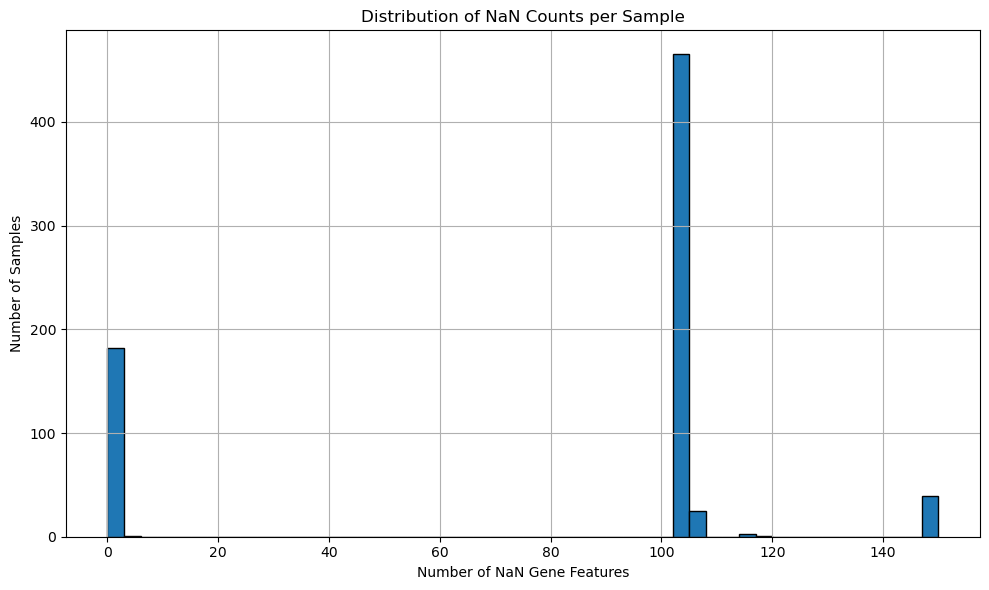

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your filtered dataset (with binning already done)
df = pd.read_csv("CRISPR_Lazertinib_Merged.csv")

# Count NaNs per sample (row-wise), only using gene feature columns
sample_nan_counts = df.iloc[:, 3:].isna().sum(axis=1)

# Create a DataFrame with ACH_ID and NaN counts
sample_nan_df = pd.DataFrame({
    "ACH_ID": df["ACH_ID"],
    "Num_NaN_Features": sample_nan_counts
})

# Save to CSV
sample_nan_df.to_csv("NaN_Counts_Per_Sample.csv", index=False)
print("Saved NaN counts per sample to NaN_Counts_Per_Sample.csv")

# Plot histogram of NaN counts per sample
plt.figure(figsize=(10, 6))
plt.hist(sample_nan_df["Num_NaN_Features"], bins=50, edgecolor='black')
plt.title("Distribution of NaN Counts per Sample")
plt.xlabel("Number of NaN Gene Features")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

Saved NaN counts per gene to NaN_Counts_Per_Gene.csv


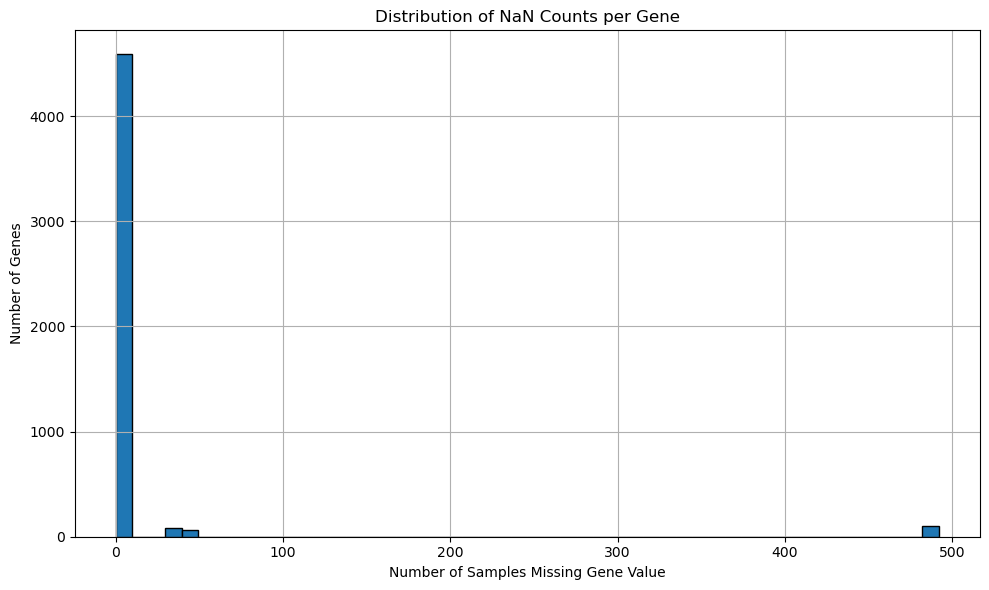

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your filtered dataset (with binning already done)
df = pd.read_csv("CRISPR_Lazertinib_Merged.csv")

# Count NaNs per gene (column-wise), skipping first 3 columns: ACH_ID, LAZERTINIB, Label
gene_nan_counts = df.iloc[:, 3:].isna().sum().sort_values(ascending=False)

# Convert to DataFrame for export
gene_nan_df = pd.DataFrame({
    "Gene": gene_nan_counts.index,
    "Num_NaN_Samples": gene_nan_counts.values
})

# Save to CSV
gene_nan_df.to_csv("NaN_Counts_Per_Gene.csv", index=False)
print("Saved NaN counts per gene to NaN_Counts_Per_Gene.csv")

# Plot histogram of NaN counts per gene
plt.figure(figsize=(10, 6))
plt.hist(gene_nan_df["Num_NaN_Samples"], bins=50, edgecolor='black')
plt.title("Distribution of NaN Counts per Gene")
plt.xlabel("Number of Samples Missing Gene Value")
plt.ylabel("Number of Genes")
plt.grid(True)
plt.tight_layout()
plt.show()

# Issue Appears to Gene Related First
Remove Problematic Genes >10 Missing Samples (in counts file it jumps from 8 to 40 fast)

In [42]:
import pandas as pd

# Load full dataset
df = pd.read_csv("CRISPR_Lazertinib_Merged.csv")

# Separate metadata + gene data (starting from column index 2, assuming A1BG is third column)
meta_cols = ["ACH_ID", "LAZERTINIB"]
gene_df = df.iloc[:, 2:]  # all gene columns (assuming A1BG is third column)

# Count NaNs per gene, filter genes with <= 10 NaNs
gene_nan_counts = gene_df.isna().sum()
genes_to_keep = gene_nan_counts[gene_nan_counts <= 10].index
gene_df_filtered = gene_df[genes_to_keep]

# Recombine with metadata
df_filtered = pd.concat([df[meta_cols], gene_df_filtered], axis=1)

# Save to file
df_filtered.to_csv("CRISPR_Lazertinib_Merged_FilteredGenesNaN.csv", index=False)
print(f"Final shape after filtering: {df_filtered.shape}")

Final shape after filtering: (716, 4591)


# RE-EXAMINE ALL THE PLOTS To SEE ISSUE and then Fill in NaNs Based on a Value

Saved NaN counts per sample to NaN_Counts_Per_Sample.csv


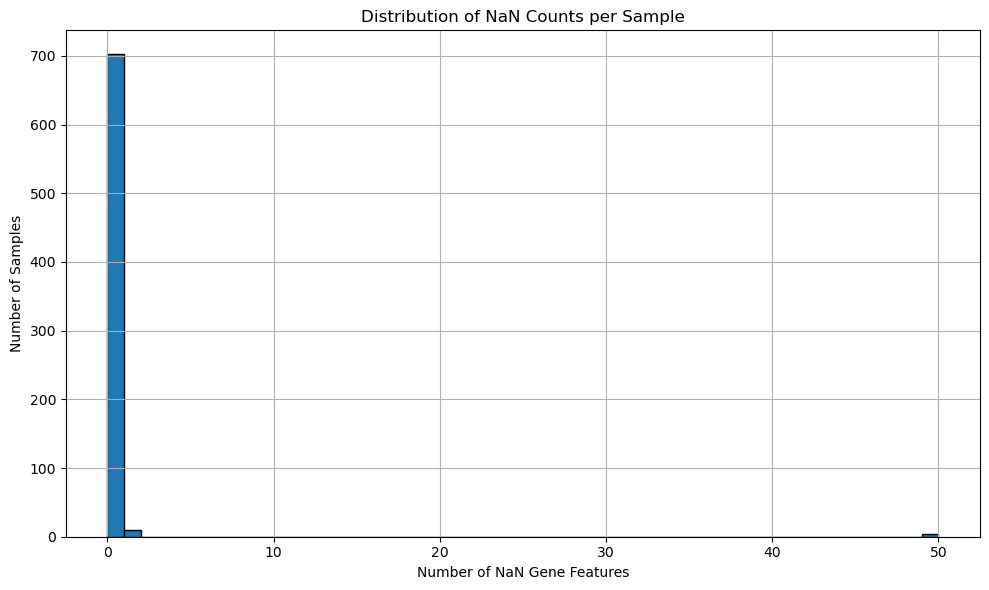

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your filtered dataset (with binning already done)
df = pd.read_csv("CRISPR_Lazertinib_Merged_FilteredGenesNaN.csv")

# Count NaNs per sample (row-wise), only using gene feature columns
sample_nan_counts = df.iloc[:, 3:].isna().sum(axis=1)

# Create a DataFrame with ACH_ID and NaN counts
sample_nan_df = pd.DataFrame({
    "ACH_ID": df["ACH_ID"],
    "Num_NaN_Features": sample_nan_counts
})

# Save to CSV
sample_nan_df.to_csv("NaN_Counts_Per_Sample.csv", index=False)
print("Saved NaN counts per sample to NaN_Counts_Per_Sample.csv")

# Plot histogram of NaN counts per sample
plt.figure(figsize=(10, 6))
plt.hist(sample_nan_df["Num_NaN_Features"], bins=50, edgecolor='black')
plt.title("Distribution of NaN Counts per Sample")
plt.xlabel("Number of NaN Gene Features")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.tight_layout()
plt.show()

Saved NaN counts per gene to NaN_Counts_Per_Gene.csv


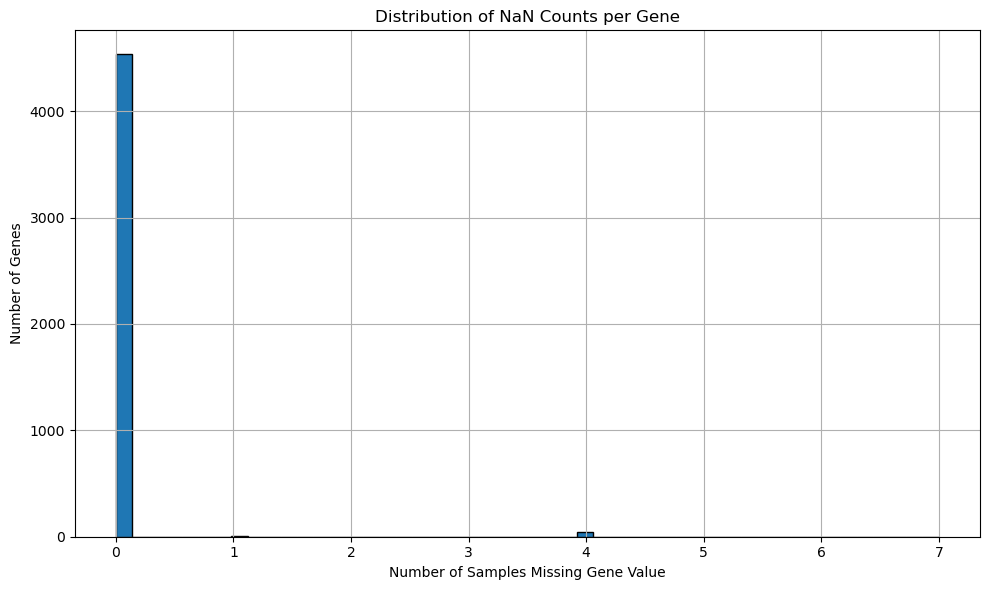

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your filtered dataset (with binning already done)
df = pd.read_csv("CRISPR_Lazertinib_Merged_FilteredGenesNaN.csv")

# Count NaNs per gene (column-wise), skipping first 3 columns: ACH_ID, LAZERTINIB, Label
gene_nan_counts = df.iloc[:, 3:].isna().sum().sort_values(ascending=False)

# Convert to DataFrame for export
gene_nan_df = pd.DataFrame({
    "Gene": gene_nan_counts.index,
    "Num_NaN_Samples": gene_nan_counts.values
})

# Save to CSV
gene_nan_df.to_csv("NaN_Counts_Per_Gene.csv", index=False)
print("Saved NaN counts per gene to NaN_Counts_Per_Gene.csv")

# Plot histogram of NaN counts per gene
plt.figure(figsize=(10, 6))
plt.hist(gene_nan_df["Num_NaN_Samples"], bins=50, edgecolor='black')
plt.title("Distribution of NaN Counts per Gene")
plt.xlabel("Number of Samples Missing Gene Value")
plt.ylabel("Number of Genes")
plt.grid(True)
plt.tight_layout()
plt.show()

# Very Few Missing Samples Are Left--- Best Impute
Impute the Average Per Column to Prevent Noise Introduction

In [45]:
import pandas as pd

# Load filtered dataset
df = pd.read_csv("CRISPR_Lazertinib_Merged_FilteredGenesNaN.csv")

# Identify the columns that are gene features (starting from A1BG onward)
non_feature_cols = ["ACH_ID", "LAZERTINIB", "Label"]
feature_cols = [col for col in df.columns if col not in non_feature_cols]

# Impute NaNs in feature columns with column mean
df[feature_cols] = df[feature_cols].apply(lambda col: col.fillna(col.mean()), axis=0)

# Optional: Save imputed version
df.to_csv("CRISPR_Lazertinib_Merged_Imputed.csv", index=False)
print("Imputation complete. File saved as CRISPR_Lazertinib_Merged_Imputed.csv")

Imputation complete. File saved as CRISPR_Lazertinib_Merged_Imputed.csv


# Create The Bins in the Dataframe (Machine Learning with 0/1)

In [46]:
import pandas as pd

# Load dataset
df = pd.read_csv("CRISPR_Lazertinib_Merged_Imputed.csv")

# Define thresholds
responder_threshold = -0.75
non_responder_threshold = -0.25

# Apply binary labels
df["Label"] = None
df.loc[df["LAZERTINIB"] < responder_threshold, "Label"] = 1
df.loc[df["LAZERTINIB"] > non_responder_threshold, "Label"] = 0

# Drop ambiguous rows
df_filtered = df[df["Label"].notna()].copy()
df_filtered["Label"] = df_filtered["Label"].astype(int)

# Reorder: keep LAZERTINIB and Label first, then rest of gene columns
cols = list(df_filtered.columns)
cols.remove("Label")
cols.insert(cols.index("LAZERTINIB") + 1, "Label")
df_filtered = df_filtered[cols]

# Save final dataset
df_filtered.to_csv("CRISPR_Lazertinib_Binarized.csv", index=False)

# Optional: confirm shape and label counts
print(df_filtered["Label"].value_counts())
print(df_filtered.head())

0    277
1    212
Name: Label, dtype: int64
       ACH_ID  LAZERTINIB  Label  AAAS (8086)  AAMP (14)  AARS1 (16)  \
0  ACH-000001   -0.859831      1    -0.097068  -1.055267   -2.708780   
1  ACH-000004   -0.241000      0    -0.106904  -1.175150   -1.858867   
2  ACH-000005    0.076372      0    -0.101209  -1.223433   -2.269649   
3  ACH-000007   -0.997610      1    -0.184977  -1.469741   -2.273808   
4  ACH-000011   -2.372298      1     0.019097  -1.131711   -1.462029   

   AARS2 (57505)  AASDHPPT (60496)  AATF (26574)  ABCB10 (23456)  ...  \
0      -0.833467         -0.408210     -0.387004        0.002005  ...   
1      -0.385564         -0.428503     -0.665771        0.148739  ...   
2      -0.182065         -0.210123     -0.777176        0.325012  ...   
3      -0.487151         -0.600583     -0.869985        0.186552  ...   
4      -0.080304         -0.303677     -0.951667       -0.026975  ...   

   ZPR1 (8882)  ZRANB1 (54764)  ZRANB2 (9406)  ZRSR2 (8233)  ZSWIM7 (125150)  \
0   

# Columns of Interest for Machine Learning----

| Column Name       | Role                                    | Include in X? |
| ----------------- | --------------------------------------- | ------------- |
| `ACH_ID`          | Metadata identifier (sample ID)         | ❌ No          |
| `LAZERTINIB`      | Raw drug score (used to generate label) | ❌ No          |
| `Label`           | Target variable (0/1)                   | ✅ As `y`      |
| `A1BG` → `A2M`... | Gene features for prediction            | ✅ As `X`      |


# Create the Train Test Datasets

In [47]:
# Load the filtered dataset
df_filtered = pd.read_csv("CRISPR_Lazertinib_Binarized.csv")

print ("Creating the Train Test Datasets")

# Split into features (X) and label (y)
X = df_filtered.drop(columns=["ACH_ID", "LAZERTINIB", "Label"])
y = df_filtered["Label"]

# Train-test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print ("Done Running")

Creating the Train Test Datasets
Done Running


# Grid Search the Model to Find Best Fit

In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 250],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42, class_weight='balanced'),
    param_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Extract best parameters
best_params = grid_search.best_params_
print("Best RF Parameters:", best_params)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best RF Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 250}


# Run the Random Forest and See Accuracy

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Paste in the best parameters found from grid search
rf = RandomForestClassifier(
    n_estimators=250,       # example
    max_depth=None,           # example
    min_samples_split=2,    # example
    min_samples_leaf=2,     # example
    random_state=42,
    class_weight='balanced'  # if you used it in the grid search
)

# Fit and evaluate as usual
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.94      0.77        83
           1       0.82      0.36      0.50        64

    accuracy                           0.69       147
   macro avg       0.74      0.65      0.64       147
weighted avg       0.73      0.69      0.65       147



# Examine the Top Features

In [50]:
# Examine Feature Importance

# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_importances.head(25)



ERBB2 (2064)       0.010061
EGFR (1956)        0.008858
GRB2 (2885)        0.005723
PTPN11 (5781)      0.005341
ZEB2 (9839)        0.004611
GAB1 (2549)        0.004526
SHC1 (6464)        0.003508
CAPZB (832)        0.003359
ERBB3 (2065)       0.002778
TMEM165 (55858)    0.002741
CDS2 (8760)        0.002564
CNOT10 (25904)     0.002445
TRAF2 (7186)       0.002415
UGCG (7357)        0.002286
KLF5 (688)         0.002266
CSNK1D (1453)      0.002263
HSPA13 (6782)      0.002240
CHMP4B (128866)    0.002183
ACOX1 (51)         0.002012
ITGA3 (3675)       0.002011
TOE1 (114034)      0.001960
STX4 (6810)        0.001952
ENAH (55740)       0.001921
CEP152 (22995)     0.001886
NCLN (56926)       0.001861
dtype: float64

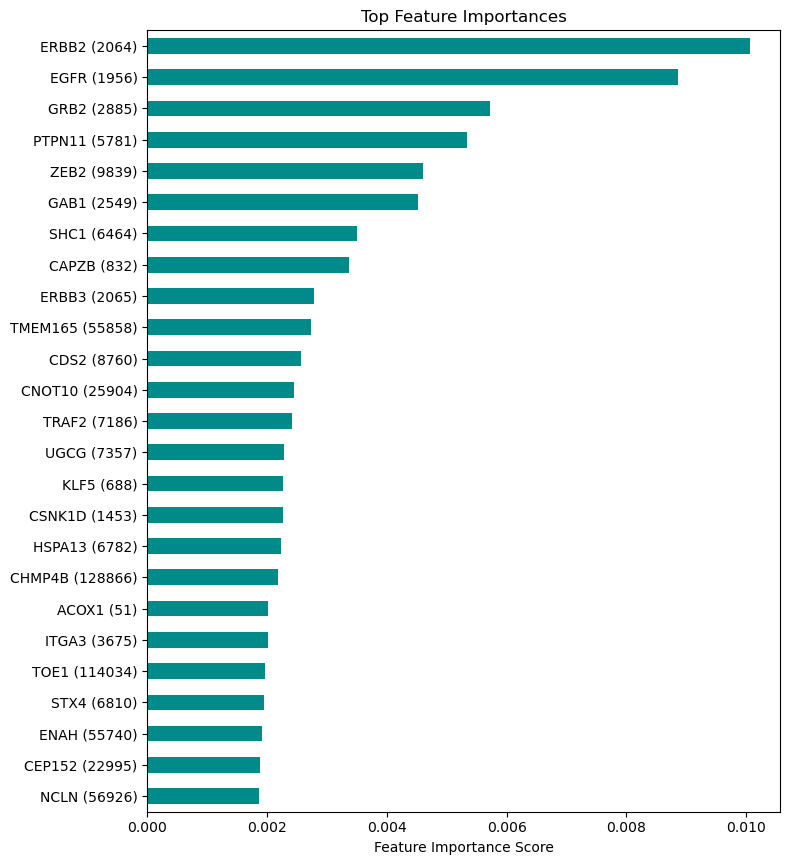

In [51]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_feature_importances(model, X_train, top_n=25, title="Top Feature Importances"):
    """
    Plots the top N most important features from a trained RandomForestClassifier.
    
    Parameters:
    - model: trained RandomForestClassifier
    - X_train: the DataFrame used to train the model
    - top_n: number of top features to plot
    - title: plot title
    """
    # Extract and sort importances
    feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    sorted_importances = feature_importances.sort_values(ascending=False)
    
    # Plot
    plt.figure(figsize=(8, top_n * 0.35))
    sorted_importances[:top_n][::-1].plot(kind='barh', color='darkcyan')
    plt.xlabel("Feature Importance Score")
    plt.title(title)
    plt.tight_layout()
    plt.show()
    
    return sorted_importances

# After fitting your final model (e.g., rf.fit(...))
top_features = plot_top_feature_importances(rf, X_train, top_n=25)

# Confusion Matrix to See Results

Text(0, 0.5, 'True Label')

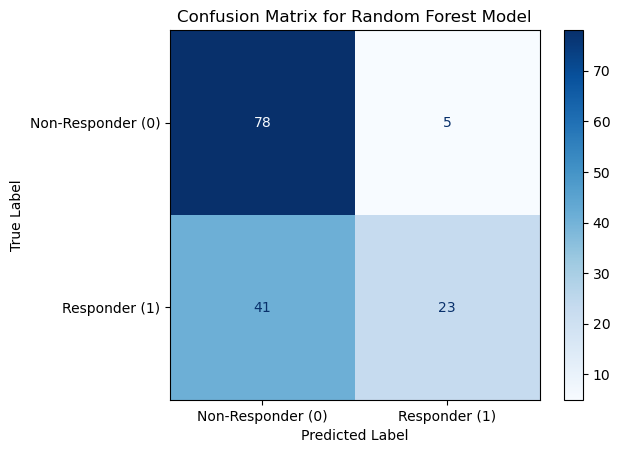

In [53]:
from sklearn.metrics import ConfusionMatrixDisplay

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels
labels = ["Non-Responder (0)", "Responder (1)"]

# Plot with axis labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
disp.ax_.set_title("Confusion Matrix for Random Forest Model")
disp.ax_.set_xlabel("Predicted Label")
disp.ax_.set_ylabel("True Label")


In [54]:
tp = cm[1][1]  # True Positive: predicted responder, actually responder
fn = cm[1][0]  # False Negative: predicted non-responder, actually responder
tn = cm[0][0]  # True Negative: predicted non-responder, actually non-responder
fp = cm[0][1]  # False Positive: predicted responder, actually non-responder

sensitivity = tp / (tp + fn) * 100   # AKA recall for class 1
specificity = tn / (tn + fp) * 100   # True negative rate

print("Sensitivity (Recall for Responders): {:.2f}%".format(sensitivity))
print("Specificity (Correct Non-Responders): {:.2f}%".format(specificity))

Sensitivity (Recall for Responders): 35.94%
Specificity (Correct Non-Responders): 93.98%


# Calculate ROC AUC Curve

ROC AUC Score: 0.722


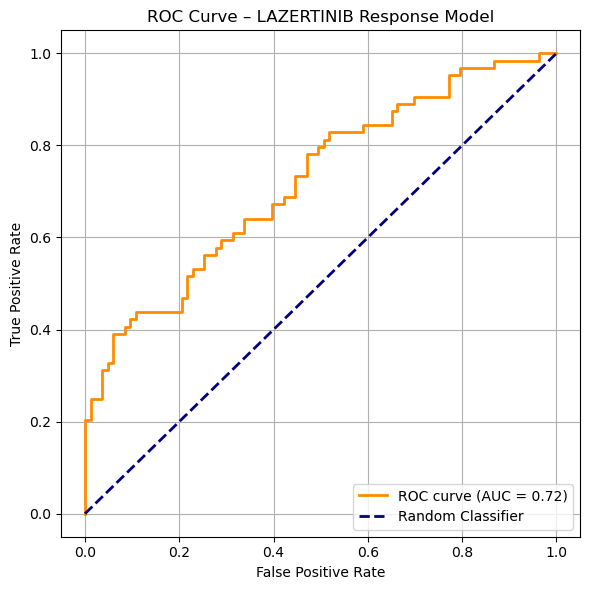

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get predicted class probabilities from your random forest model
y_pred_prob = rf.predict_proba(X_test)[:, 1]  # rf = your trained model

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)

# Compute AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print AUC
print(f"ROC AUC Score: {roc_auc:.3f}")

# Plot the ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve – LAZERTINIB Response Model')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting the Data To See If Makes Sense

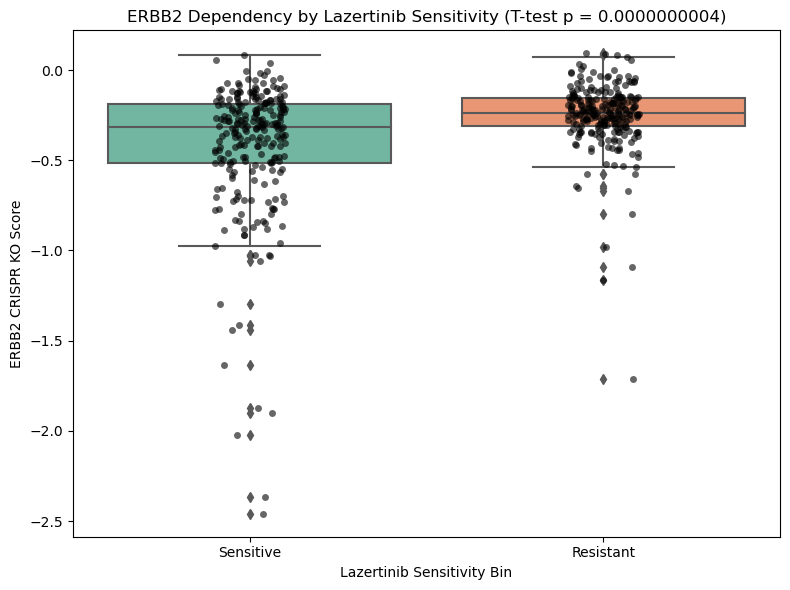

Mean ERBB2 (Sensitive): -0.42337493020793737
Mean ERBB2 (Resistant): -0.2528023485319329


In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("CRISPR_Lazertinib_Binarized.csv")

# Create bins based on LAZERTINIB sensitivity
df['Sensitivity_Bin'] = pd.qcut(df['LAZERTINIB'], q=2, labels=['Sensitive', 'Resistant'])

# T-test on EGFR knockout values between bins
erbb2_sensitive = df[df['Sensitivity_Bin'] == 'Sensitive']['ERBB2 (2064)']
erbb2_resistant = df[df['Sensitivity_Bin'] == 'Resistant']['ERBB2 (2064)']
t_stat, p_val = ttest_ind(erbb2_sensitive, erbb2_resistant)

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Sensitivity_Bin', y='ERBB2 (2064)', data=df, palette='Set2')
sns.stripplot(x='Sensitivity_Bin', y='ERBB2 (2064)', data=df, color='black', jitter=True, alpha=0.6)

plt.title(f'ERBB2 Dependency by Lazertinib Sensitivity (T-test p = {p_val:.10f})')
plt.xlabel('Lazertinib Sensitivity Bin')
plt.ylabel('ERBB2 CRISPR KO Score')
plt.tight_layout()
plt.show()

print("Mean ERBB2 (Sensitive):", erbb2_sensitive.mean())
print("Mean ERBB2 (Resistant):", erbb2_resistant.mean())

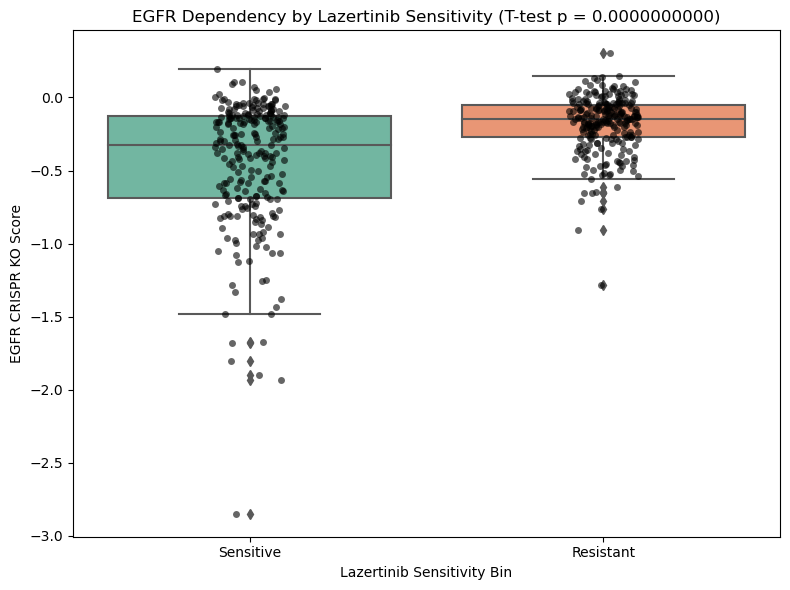

Mean EGFR (Sensitive): -0.4453355814350392
Mean EGFR (Resistant): -0.18066962367548167


In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Load dataset
df = pd.read_csv("CRISPR_Lazertinib_Binarized.csv")

# Create bins based on LAZERTINIB sensitivity
df['Sensitivity_Bin'] = pd.qcut(df['LAZERTINIB'], q=2, labels=['Sensitive', 'Resistant'])

# T-test on EGFR knockout values between bins
egfr_sensitive = df[df['Sensitivity_Bin'] == 'Sensitive']['EGFR (1956)']
egfr_resistant = df[df['Sensitivity_Bin'] == 'Resistant']['EGFR (1956)']
t_stat, p_val = ttest_ind(egfr_sensitive, egfr_resistant)

# Plot
plt.figure(figsize=(8,6))
sns.boxplot(x='Sensitivity_Bin', y='EGFR (1956)', data=df, palette='Set2')
sns.stripplot(x='Sensitivity_Bin', y='EGFR (1956)', data=df, color='black', jitter=True, alpha=0.6)

plt.title(f'EGFR Dependency by Lazertinib Sensitivity (T-test p = {p_val:.10f})')
plt.xlabel('Lazertinib Sensitivity Bin')
plt.ylabel('EGFR CRISPR KO Score')
plt.tight_layout()
plt.show()

print("Mean EGFR (Sensitive):", egfr_sensitive.mean())
print("Mean EGFR (Resistant):", egfr_resistant.mean())